In [1]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2024-09-28 10:53:49--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2024-09-28 10:53:49 (621 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [5]:
import numpy as np

In [6]:
import numpy as np
# data 불러오기 및 전처리
X = []
Y = []

for line in open("iris.data", "r"):
  line = line.strip()
  if line == "": continue

  *x, y = line.split(",")
  x = [float(i) for i in x]
  X.append(x)
  Y.append(y)

labels = list(set(Y))
Y = [labels.index(y) for y in Y] # Y값을 0, 1, 2로 라벨링

X = np.array(X)
Y = np.array(Y)

print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

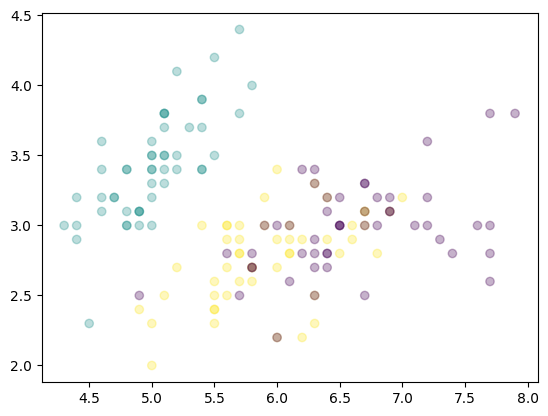

In [7]:
# data 살펴보기
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=Y, alpha=0.3)
plt.show()

In [8]:
# KNNClassifier 구현
# np.linalg.norm: norm 계산(l2-norm) - 유클리드 놈, sqrt(x^2 + y^2)
# np.argsort: 정렬된 인덱스 계산
# np.bincount: 배열 원소별로 등장 횟수 계산 # np.bitcount -> np.bincount 로 수정

class KNNClassifier:
  def __init__(self, k):
    self.k = k

  def fit(self, X, Y):
    self.X = X
    self.Y = Y

  def predict(self, queries):
    Y = []
    for q in queries:
      dists = np.linalg.norm(self.X - q, axis = 1) # 각 벡터마다의 거리를 계산하기 위해 axis = 1로 설정
      knns = np.argsort(dists)[:self.k] # arrsort로 정렬하고, k개를 뽑으면 거리가 가장 가까운 k개의 인덱스 임
      counts = np.bincount(self.Y[knns]) # np.bitcount -> np.bincount 로 수정: 각 클래스 레이블의 발생 횟수를 계산
      Y.append(np.argmax(counts)) # counts에서 가장 큰 것을 뽑아냄

    return np.array(Y)

In [9]:
# train / test dataset 나눠서 성능 확인

perm = np.random.permutation(len(X)) # 데이터의 값들을 무작위로 섞어줌

X = X[perm]
Y = Y[perm]

n_trains = int(0.8  * len(X))
X_train = X[:n_trains]
Y_train = Y[:n_trains]
X_test = X[n_trains:]
Y_test = Y[n_trains:]

# KNNClassifier 테스트

knn = KNNClassifier(5)
knn.fit(X_train, Y_train) #데이터를 kNN에 넣어줌

train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

print(test_pred)
print(Y_test)

print("train accuracy:", (train_pred == Y_train).mean())
print("test accuracy:", (test_pred == Y_test).mean())

[0 0 0 1 0 0 0 2 1 1 2 0 1 2 0 1 2 2 1 0 0 2 2 1 1 2 0 2 1 1]
[0 0 0 1 0 0 0 2 1 1 2 2 1 2 0 1 2 2 1 0 0 2 2 1 1 2 0 2 1 1]
train accuracy: 0.975
test accuracy: 0.9666666666666667


In [10]:
# Cross Validation으로 성능 확인
def cross_val_score(knn, X, Y, cv):
  n = len(X)
  perm = np.random.permutation(n)
  X = X[perm]
  Y = Y[perm]
  scores = []

  for i in range(cv):
    start = i * n // cv
    end = (i + 1) * n // cv
    X_train = np.concatenate([X[:start], X[end:]])
    Y_train = np.concatenate([Y[:start], Y[end:]])
    X_test = X[start:end]
    Y_test = Y[start:end]

    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    scores.append((pred == Y_test).mean())

  return np.array(scores)

knn = KNNClassifier(5)
scores = cross_val_score(knn, X, Y, 10)
print(scores.mean())

0.96


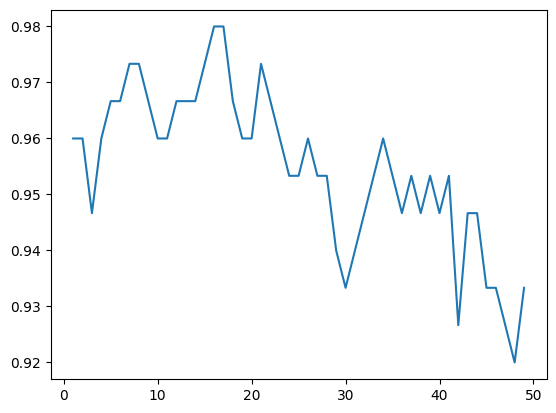

In [14]:
# 최적의 k 찾기
# k를 바꿔가며 cross validation score 계산
scores = []
test_scores = []

for k in range(1, 50):
  knn = KNNClassifier(k)
  score = cross_val_score(knn, X, Y, 10).mean()
  scores.append(score)

plt.plot(range(1, 50), scores)
plt.show() # k가 너무 낮으면 오버피팅, k가 너무 많으면 언더피팅이 일어나는 것을 알 수 있음

In [15]:
# Scikit-learn으로 kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("train accuracy:", accuracy_score(y_train_pred, y_train))
print("test accuracy:", accuracy_score(y_test_pred, y_test))


train accuracy: 0.9583333333333334
test accuracy: 1.0


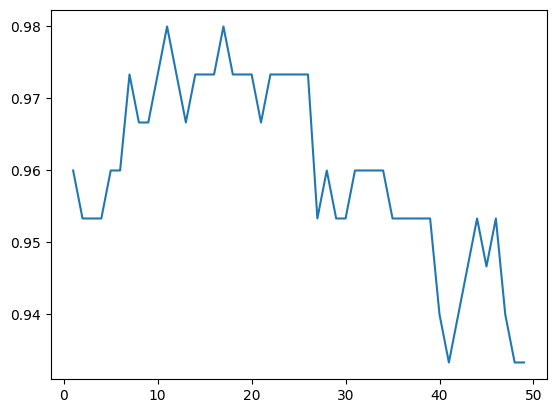

In [16]:
# Scikit-learn으로 kNN
from sklearn.model_selection import cross_val_score

scores = []

for k in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X, Y, cv=10, scoring="accuracy").mean()
  scores.append(score)

plt.plot(range(1, 50), scores)
plt.show()